In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_greed0 = pd.read_csv('Data/df_final_greedy.csv',index_col=0)
df_greed1 = pd.read_csv('Data/df_final_greedy1.csv',index_col=0)
df_greed2 = pd.read_csv('Data/df_final_greedy2.csv',index_col=0)
df_greed = pd.concat([df_greed0,df_greed1,df_greed2])#;df_greed
#df_greed_g = df_greed.groupby('Room_Name').mean();df_greed_g

In [43]:
df_greed_g=df_greed0.groupby('Room_Name').mean()[['Efficiency','Score']];df_greed_g

,Efficiency,Score
Room_Name,,
corridor,85.374695,77.283886
house,85.584365,60.437132
moving,94.993826,68.994922
triangle,90.693965,92.678766


In [45]:
df_greed_g.to_csv('Data_Submit/greedy_group.csv')

In [37]:
df_cont0 = pd.read_csv('Data/df_final_q_cont0.csv',index_col = 0)
df_cont0['Rps'] = df_cont0['Tot_reward']/df_cont0['Iterations']
df_cont1 = pd.read_csv('Data/df_final_q_cont1.csv',index_col = 0)
df_cont1['Rps'] = df_cont1['Tot_reward']/df_cont1['Iterations']
df_cont = pd.concat([df_cont0,df_cont1])
df_cont_g = df_cont.groupby(['Room_Name','Gamma']).mean()

In [38]:
df_cont_g = df_cont.groupby(['Room_Name','Gamma']).mean()[['Efficiency','Score']];df_cont_g

Efficiency      Score
Room_Name Gamma                       
corridor  0.2     80.434642  66.241964
          0.5     85.461230  74.836608
          0.8     80.909091  65.590425
          1.0     96.908612  88.041728
house     0.2     94.172687  65.738273
          0.5     91.332548  61.397606
          0.8     86.740211  56.667499
          1.0     99.194963  70.318239
moving    0.2     95.894910  60.023556
          0.5     96.667914  50.076250
          0.8     98.065891  62.287017
          1.0     98.069544  73.085445
triangle  0.2     97.423704  95.052249
          0.5     91.506905  93.920936
          0.8     99.220781  95.053993
          1.0     92.884181  94.713756

In [41]:

df_cont_g.iloc[[3,7,11,14]].to_csv('Data_submit/Q_group.csv')

[10.786169229406381, 14.281377477625526, 12.140536528852307, 11.263934154075145]
[96.90861200295161, 99.19496288543907, 98.06954379648492, 99.22078071446644]
[88.04172839981271, 70.3182391832583, 73.08544470753634, 95.05399316910108]


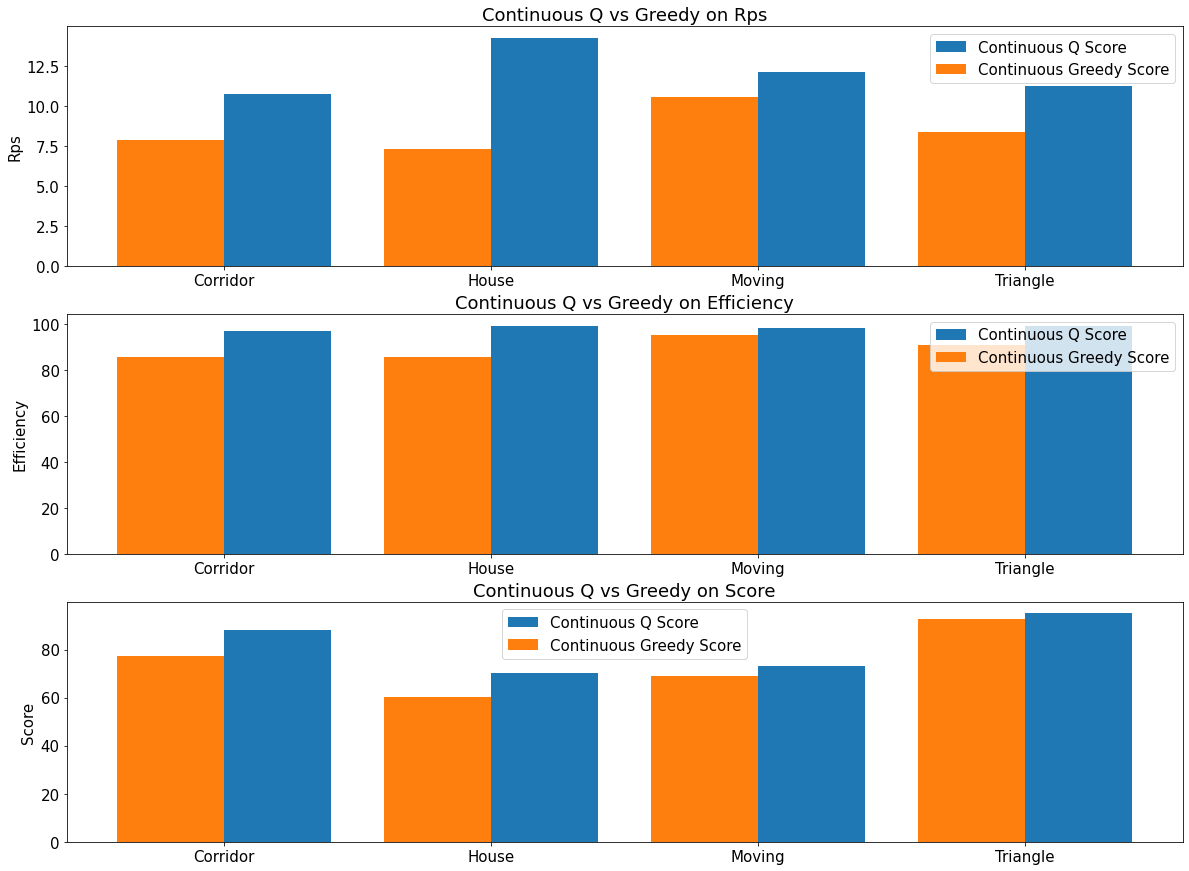

In [32]:
fig,axes = plt.subplots(3,1, figsize = (20,15))
x = [0,1,2,3]
for i,metric in enumerate(['Rps','Efficiency','Score']):
    ax = axes[i]
    lst_cont = df_cont_g.iloc[[3,7,11,14]][metric].to_list()
    print(lst_cont)
    lst_greed = df_greed_g[metric].to_numpy()
    ax.bar([a + 0.2 for a in x],lst_cont,width=0.4,label ='Continuous Q Score')
    ax.bar([a - 0.2 for a in x],lst_greed,width=0.4,label = 'Continuous Greedy Score')
    ax.legend()
    ax.set_title(f'Continuous Q vs Greedy on {metric}')
    ax.set_ylabel(metric)
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels(['Corridor','House','Moving','Triangle'])

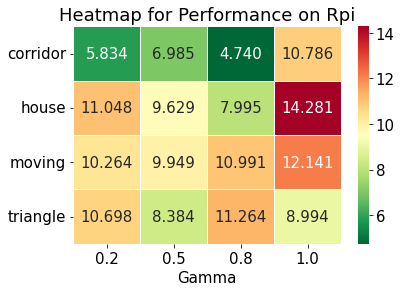

In [24]:
def heatmap(columns, rows, scores):
    """ Simple heatmap.
    Keyword arguments:
    columns -- list of options in the columns
    rows -- list of options in the rows
    scores -- numpy array of scores
    """
    plt.figure() 
    plt.rcParams.update({'font.size': 15})
    df = pd.DataFrame(scores, index=rows, columns=columns)
    sns.heatmap(df, cmap='RdYlGn_r', linewidths=0.5, annot=True, fmt=".3f")
    plt.xlabel('Gamma')
    plt.title('Heatmap for Performance on Rpi')

heatmap([0.2,0.5,0.8,1],['corridor','house','moving','triangle'],df_cont_g['Rps'].to_numpy().reshape(4,4))

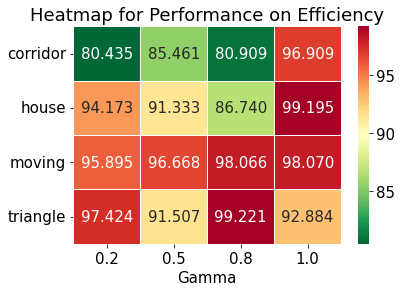

In [22]:
def heatmap(columns, rows, scores):
    """ Simple heatmap.
    Keyword arguments:
    columns -- list of options in the columns
    rows -- list of options in the rows
    scores -- numpy array of scores
    """
    plt.figure() 
    plt.rcParams.update({'font.size': 15})
    df = pd.DataFrame(scores, index=rows, columns=columns)
    sns.heatmap(df, cmap='RdYlGn_r', linewidths=0.5, annot=True, fmt=".3f")
    plt.xlabel('Gamma')
    plt.title('Heatmap for Performance on Efficiency')

heatmap([0.2,0.5,0.8,1],['corridor','house','moving','triangle'],df_cont_g['Efficiency'].to_numpy().reshape(4,4))

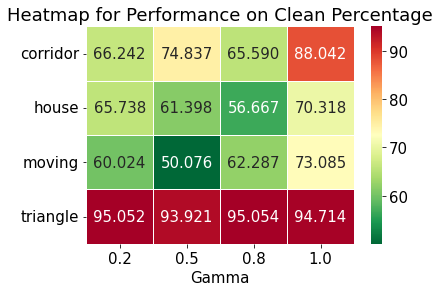

In [25]:
def heatmap(columns, rows, scores):
    """ Simple heatmap.
    Keyword arguments:
    columns -- list of options in the columns
    rows -- list of options in the rows
    scores -- numpy array of scores
    """
    plt.figure() 
    plt.rcParams.update({'font.size': 15})
    df = pd.DataFrame(scores, index=rows, columns=columns)
    sns.heatmap(df, cmap='RdYlGn_r', linewidths=0.5, annot=True, fmt=".3f")
    plt.xlabel('Gamma')
    plt.title('Heatmap for Performance on Clean Percentage')

heatmap([0.2,0.5,0.8,1],['corridor','house','moving','triangle'],df_cont_g['Score'].to_numpy().reshape(4,4))